In [128]:
%matplotlib inline
import cPickle as pkl
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
dataset = pkl.load(open('dataset.pkl', 'rb'))

In [133]:
bots = [u for u in dataset.keys() if "-bot" == str(u)[-4:]]

In [134]:
from hmmlearn import hmm

In [142]:
hmmdata = [dataset[u] for u in dataset.keys() if "bot" not in str(u)]

In [143]:
hmmdata = [h for h in hmmdata if 150 > len(h) and len(h) > 140]

In [144]:
len(hmmdata)

802

In [145]:
lens = [len(h) for h in hmmdata]

In [146]:
hmmdata = [[h for h in x] for x in hmmdata]

In [150]:
X = np.concatenate(hmmdata)

In [151]:
set(list(X))

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27}

In [113]:
# from sklearn.preprocessing import LabelEncoder
# v = LabelEncoder()
# v.fit(X)

LabelEncoder()

In [149]:
# X = []
# for h in hmmdata:
#     X.append(v.transform(h))

ValueError: y contains new labels: [1]

In [218]:
n_components = 5

In [219]:
import warnings
warnings.filterwarnings('ignore')

In [220]:
model = hmm.MultinomialHMM(n_components=n_components)

In [221]:
model.fit(np.atleast_2d(X).T,lens)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=5,
        n_iter=10, params='ste',
        random_state=<mtrand.RandomState object at 0x11192a730>,
        startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=False)

In [188]:
label_encodings = ['MemberEvent_same',
 'PublicEvent_same',
 'PullRequestReviewCommentEvent_same',
 'ForkEvent_same',
 'GollumEvent_same',
 'ReleaseEvent_same',
 'PullRequestEvent_same',
 'IssueCommentEvent_same',
 'PushEvent_same',
 'DeleteEvent_same',
 'CommitCommentEvent_same',
 'WatchEvent_same',
 'IssuesEvent_same',
 'CreateEvent_same',
 'MemberEvent_diff',
 'PublicEvent_diff',
 'PullRequestReviewCommentEvent_diff',
 'ForkEvent_diff',
 'GollumEvent_diff',
 'ReleaseEvent_diff',
 'PullRequestEvent_diff',
 'IssueCommentEvent_diff',
 'PushEvent_diff',
 'DeleteEvent_diff',
 'CommitCommentEvent_diff',
 'WatchEvent_diff',
 'IssuesEvent_diff',
 'CreateEvent_diff']

In [222]:
model.transmat_

array([[ 0.29726898,  0.362319  ,  0.16502718,  0.12034492,  0.05503991],
       [ 0.17749259,  0.58648028,  0.15996606,  0.0514938 ,  0.02456727],
       [ 0.19148647,  0.34061145,  0.26995111,  0.07110895,  0.12684202],
       [ 0.11045206,  0.05224291,  0.04408392,  0.74509857,  0.04812254],
       [ 0.02121818,  0.01419671,  0.04879946,  0.0529483 ,  0.86283735]])

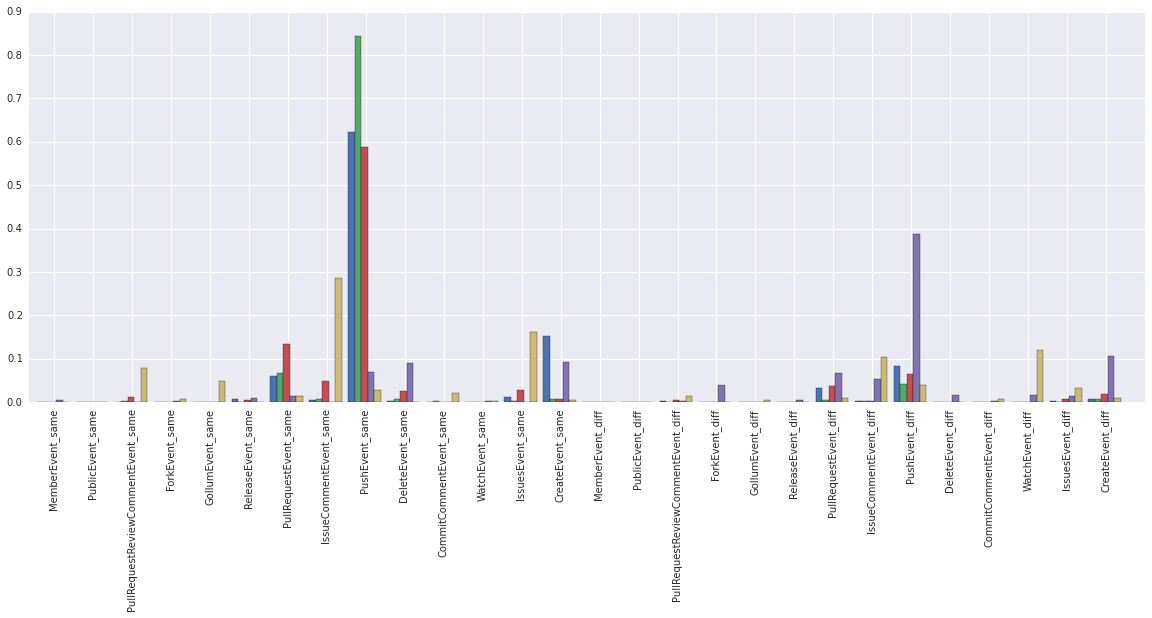

In [223]:
xcoords = np.arange(28)
plt.figure(figsize=(20,7))
ax = plt.subplot(111)
xcoord = .3
colors = sns.color_palette()
for n in range(n_components):
    ax.bar(xcoords - xcoord + n*1./(n_components+1), model.emissionprob_[n], width = 1./(n_components+1), color=colors[n])
ax.set_xticklabels(label_encodings, rotation='vertical')

plt.xlim([-.5,28])
plt.xticks(np.arange(0,29)+.15)

plt.show()
